# Betweenness centrality for the Random Geometric Graph on a parabolic surface

Paper: Surfacic Networks

Barthelemy et al., PNAS Nexus 2025

In [1]:
import networkx as nx
import osmnx as ox
import pandas as pd
import numpy as np
import seaborn as sns
import math
from scipy.optimize import curve_fit

from matplotlib import pyplot as plt
from matplotlib import cm

pd.set_option('display.max_rows', 60)

def linear(x,a,b):
    return a*x+b

def powerlaw(x,a,b):
    return a*pow(x,b)

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')


'3.1'

r0=  0.3
########### number of nodes 200
----- conf  10 0.0
----- conf  20 0.0
----- conf  30 0.0
----- conf  40 0.0
----- conf  50 0.0
----- conf  60 0.0
----- conf  70 0.0
----- conf  80 0.0
----- conf  90 0.0
----- conf  100 0.0
ave SP=  0.0 0.9338632090689443


/var/folders/fv/4lww3ydx1j9fzx55tbdvlqsr0000gn/T/ipykernel_71204/1300598324.py:221: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(bins.index, bins.bc, 'g-', lw=4,c=zcolor[iz], label=r'$z_{max}=$'+str(z_max),alpha=0.7)


----- conf  10 1.0
----- conf  20 1.0
----- conf  30 1.0
----- conf  40 1.0
----- conf  50 1.0
----- conf  60 1.0
----- conf  70 1.0
----- conf  80 1.0
----- conf  90 1.0
----- conf  100 1.0
ave SP=  1.0 1.195504898586247


/var/folders/fv/4lww3ydx1j9fzx55tbdvlqsr0000gn/T/ipykernel_71204/1300598324.py:221: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(bins.index, bins.bc, 'g-', lw=4,c=zcolor[iz], label=r'$z_{max}=$'+str(z_max),alpha=0.7)


----- conf  10 2.0
----- conf  20 2.0
----- conf  30 2.0
----- conf  40 2.0
----- conf  50 2.0
----- conf  60 2.0
----- conf  70 2.0
----- conf  80 2.0
----- conf  90 2.0
----- conf  100 2.0
ave SP=  2.0 1.731060638263755


/var/folders/fv/4lww3ydx1j9fzx55tbdvlqsr0000gn/T/ipykernel_71204/1300598324.py:221: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(bins.index, bins.bc, 'g-', lw=4,c=zcolor[iz], label=r'$z_{max}=$'+str(z_max),alpha=0.7)


----- conf  10 4.0
----- conf  20 4.0
----- conf  30 4.0
----- conf  40 4.0
----- conf  50 4.0
----- conf  60 4.0
----- conf  70 4.0
----- conf  80 4.0
----- conf  90 4.0
----- conf  100 4.0
ave SP=  4.0 1.60411203994723


/var/folders/fv/4lww3ydx1j9fzx55tbdvlqsr0000gn/T/ipykernel_71204/1300598324.py:221: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.
  plt.plot(bins.index, bins.bc, 'g-', lw=4,c=zcolor[iz], label=r'$z_{max}=$'+str(z_max),alpha=0.7)


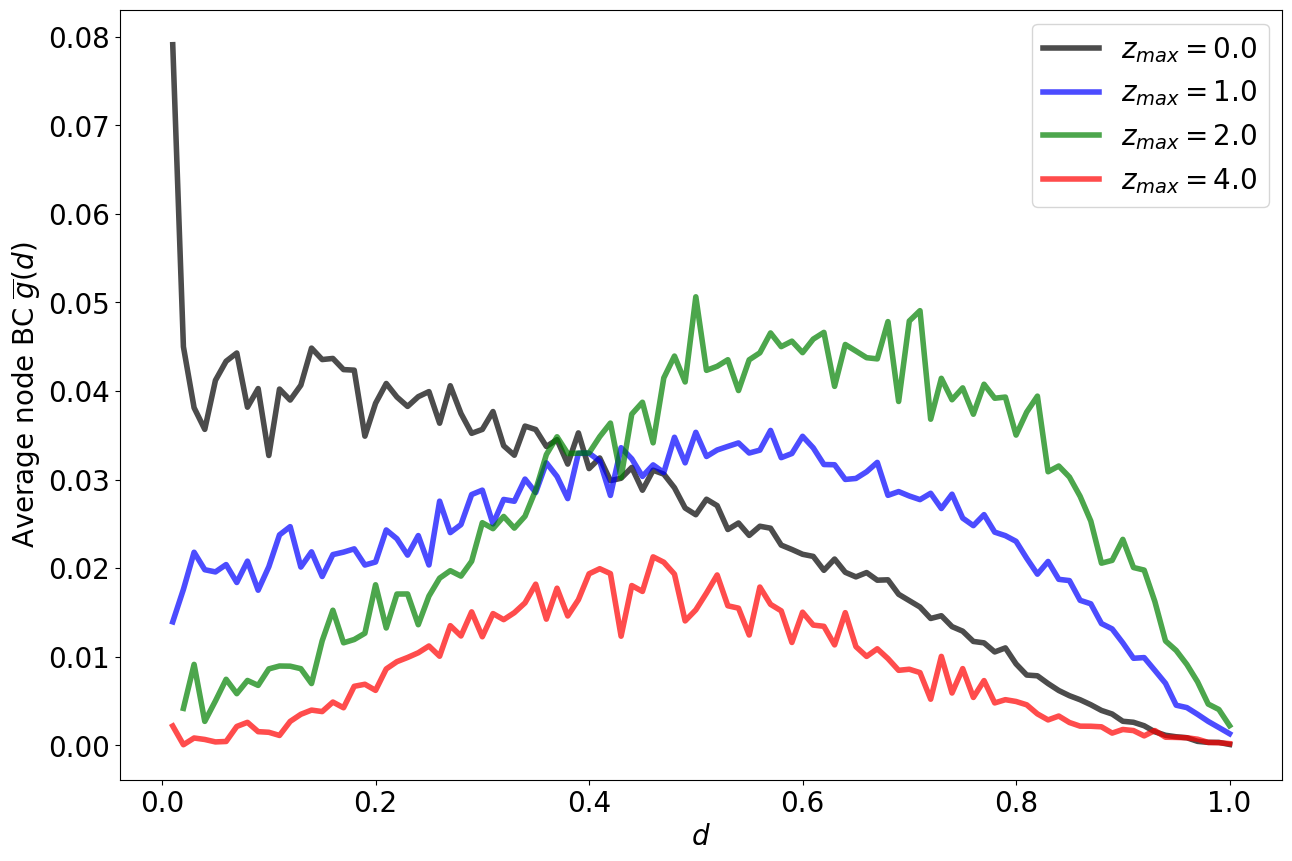

In [6]:
# init data
number_conf = 100
number_nodes_max = 200
rr = 1.0
avek = 18.0
r0 = rr * np.sqrt(avek/float(number_nodes_max))
print('r0= ',r0)

zcolor=['black','blue','green','red'] #0.1,.3]  #[.1] #, .3, .5, .7, .99]
zlist = [0, 1, 2, 4]

gamma = 100.0
z_sup = 10.0

nz = 10

list_nn = []
list_L2dave = []
list_L3dave = []
list_max2dave = []
list_max3dave = []
        
for number_nodes in range(1): #100,number_nodes_max,100):
    
    number_nodes = number_nodes_max
    print('########### number of nodes',number_nodes)
    list_z = []
    list_zg = []
    list_ard = []
    list_gain = []

    list_z_decep = []
    list_decep = []
    list_gain_decep = []
    
    fig, ax = plt.subplots(1, 1,figsize=(15,10)) 

    #for iz in range(0,nz):
    #for iz in range(0,4):
    for iz in range(0,4):
        
        z_max = float(zlist[iz]) 
        #z_max = 5.0
        #z_max = float(iz)
        
        counter = 0
        list_ratl = []
        list_ratz = []
        list_dd = []
        list_ratl_naive = []
        list_ratz_naive = []

        
        xs = []
        ys = []

        df_all = pd.DataFrame(columns=('d2c', 'bc'))
        icount_df = 0
              
        l_ave=0
        for conf in range(number_conf):

            counter +=1
            if counter % 10 == 0:
                print('----- conf ',counter,z_max)
            # generate random points
            r = np.random.uniform(low=0, high=1, size=number_nodes)  # radius
            theta = np.random.uniform(low=0, high=2*np.pi, size=number_nodes)  # angle

            x = np.sqrt(r) * np.cos(theta)
            y = np.sqrt(r) * np.sin(theta)
            z = z_max*(1.0 - np.square(x)-np.square(y))

            # read positions
            nplist = np.arange(start=1, stop=number_nodes+1, step=1)
            df_pos = pd.DataFrame({'node_i': nplist,'x': x, 'y': y, 'z':z})

            distance_2_center = np.sqrt(x**2+y**2)
            df_pos['d2c'] = distance_2_center
                        
            # from df pos create dictionary
            dict_pos = {x[0]: x[1:3] for x in df_pos.itertuples(index=False)}

            # create adjacency matrix in pd format:
            # index/node_i/node_j/d3d/d2d/abs(dz)

            x = df_pos['x'].values
            y = df_pos['y'].values
            z = df_pos['z'].values

            df_adj = pd.DataFrame(columns=('node_i', 'node_j', 'd3d', 'd2d', 'absdz','weight'))
            icount = 0
            for i in range(1, number_nodes+1):
                for j in range(1, number_nodes+1):
                    if i != j:
                        #print(i,j)
                        dx = x[i-1] - x[j-1]
                        dy = y[i-1] - y[j-1]
                        dz = z[i-1] - z[j-1]
                        d2d_val = np.sqrt(dx**2+dy**2)
                        d3d_val = np.sqrt(dx**2+dy**2+dz**2)
                        absdz_val = abs(dz)
                        weight_val = np.sqrt(dx**2+dy**2+gamma*dz**2)
                        if d3d_val < r0:      #definition of the RGG in 3d
                            icount += 1
                            df_adj.loc[icount] = [i,j,d3d_val,d2d_val,absdz_val,weight_val]

            df_adj = df_adj.astype({'node_i':'int'})
            df_adj = df_adj.astype({'node_j':'int'})
            df_adj
            #print(dfnew.head(4))

            # create weighted graph from the df
            G3d = nx.from_pandas_edgelist(df_adj, 'node_i', 'node_j',
                                        create_using=nx.Graph(), edge_attr='d3d')

            G2d = nx.from_pandas_edgelist(df_adj, 'node_i', 'node_j',
                                        create_using=nx.Graph(), edge_attr='d2d')

            #Gz = nx.from_pandas_edgelist(df_adj, 'node_i', 'node_j',
            #                            create_using=nx.Graph(), edge_attr='absdz')

            Ggen = nx.from_pandas_edgelist(df_adj, 'node_i', 'node_j',
                                        create_using=nx.Graph(), edge_attr='weight')


            # compute BC
            bc_node = nx.betweenness_centrality(G3d, weight="d3d")
            for key, value in bc_node.items():
                #print('node-bc',key,value)
                #print('d2c of node= ',distance_2_center[key-1])
                icount_df +=1
                df_all.loc[icount_df] = [distance_2_center[key-1],value]

            largest_cc = max(nx.connected_components(G3d), key=len)
            S = G3d.subgraph(largest_cc).copy() 
            l_ave += nx.average_shortest_path_length(S, weight='d3d')
            
            
        df_all = df_all.reset_index(drop=True)    
        print('ave SP= ',z_max,l_ave/float(number_conf))

        # other method
        df_all.sort_values(by='d2c', inplace=True)
        # round x values then group by to create bins
        round_by = 2
        bins = df_all.groupby(df_all.d2c.round(round_by)).mean()

        #ax.scatter(df.x, df.y, s=1)
        plt.plot(bins.index, bins.bc, 'g-', lw=4,c=zcolor[iz], label=r'$z_{max}=$'+str(z_max),alpha=0.7)
        
        #### plot results
        ax.set_xlabel(r'$d$', fontsize=20)
        ax.set_ylabel(r'Average node BC $\overline{g}(d)$', fontsize=20)
        ax.tick_params(axis='both', labelsize=20)  
        ax.legend(loc='best',fontsize=20) 
        fig.savefig('fig_BC_vs_r.pdf')
        #plt.xscale('log')
        #plt.yscale('log')
        